In [1]:
!pip install --upgrade pandas_datareader
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')




In [2]:
#Get the stock quote,

df = web.DataReader('AAPL',data_source = 'yahoo', start='2015-01-01', end='2022-01-01')

print(df.shape)

# plt.figure(figsize=(16,8))
# plt.title('Close Price History')
# plt.plot(df['Close'])
# plt.xlabel('Date',fontsize =18)
# plt.ylabel('Close Price USD($)',fontsize = 18)
# plt.show()

#Create a new dataframe with the Close Column.

data =df.filter(['Close'])

#Convert the dataframe to numpy array 

dataset = data.values

#Getting the number of rows to train the model

training_data_len = math.ceil(len(dataset) * 0.8)

print(training_data_len)




(1763, 6)
1411


In [3]:
#Scale the data 

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

#Create the training data set

#Creating the scaled data set

train_data = scaled_data[0:training_data_len,:]

#Split the data into x_train and y_train data set

x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()
        
#Convert X & Y train to numpy array to use LSTM Model.

x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data as LSTM expects the data to be in 3-Dimensions
# numper of samples, number of timesteps, and number of features, while right now it is 2-Dimensional

    
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

# print(x_train.shape)



[array([0.03009605, 0.02521475, 0.0252306 , 0.02759201, 0.03415323,
       0.03434341, 0.02996926, 0.03150655, 0.03084092, 0.02611811,
       0.02480269, 0.0291293 , 0.03044472, 0.0349615 , 0.0358807 ,
       0.03607088, 0.02979493, 0.03957336, 0.04526293, 0.04250532,
       0.04483502, 0.04486672, 0.04630892, 0.04691116, 0.04531047,
       0.0465625 , 0.05020761, 0.05474025, 0.05724429, 0.05822689,
       0.05941552, 0.06082602, 0.06039811, 0.06206219, 0.06760912,
       0.0662937 , 0.06093695, 0.06352024, 0.06041397, 0.06141241,
       0.06184032, 0.06054074, 0.05716506, 0.05746617, 0.05832198,
       0.05415386, 0.05055628, 0.05405877, 0.05269581, 0.05485118,
       0.0581635 , 0.06042981, 0.05889252, 0.05635679, 0.05843292,
       0.05760881, 0.05236299, 0.05372595, 0.05215697, 0.05710166])]
[0.05402707435057527]

[array([0.03009605, 0.02521475, 0.0252306 , 0.02759201, 0.03415323,
       0.03434341, 0.02996926, 0.03150655, 0.03084092, 0.02611811,
       0.02480269, 0.0291293 , 0.03

In [4]:
#Building the LSTM Model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False ))
model.add(Dense(25))
model.add(Dense(1))

In [5]:
#Compile the model
model.compile(optimizer='adam',loss = 'mean_squared_error')

In [6]:
#training the model

model.fit(x_train,y_train,batch_size=1,epochs=10)    #fit a method to train the model.


Epoch 1/10
1351/1351 [==============================] - 52s 35ms/step - loss: 4.5504e-04
Epoch 2/10
1351/1351 [==============================] - 34s 25ms/step - loss: 2.3618e-04
Epoch 3/10
1351/1351 [==============================] - 34s 26ms/step - loss: 1.8936e-04
Epoch 4/10
1351/1351 [==============================] - 36s 27ms/step - loss: 2.0130e-04
Epoch 5/10
1351/1351 [==============================] - 34s 25ms/step - loss: 1.3630e-04
Epoch 6/10
1351/1351 [==============================] - 34s 25ms/step - loss: 1.3738e-04
Epoch 7/10
1351/1351 [==============================] - 35s 26ms/step - loss: 1.1120e-04
Epoch 8/10
1351/1351 [==============================] - 35s 26ms/step - loss: 1.1278e-04
Epoch 9/10
1351/1351 [==============================] - 34s 25ms/step - loss: 1.2971e-04
Epoch 10/10
1351/1351 [==============================] - 35s 26ms/step - loss: 1.1478e-04


In [7]:
#Create the testing dataset

#Create a new array containing scaled values from index 1351 to the end of the data set

test_data = scaled_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [8]:
#Convert the data again to a numpy array 

x_test = np.array(x_test)

In [9]:
#Reshape again to use in the LSTM Model again for 3D inputs.

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [10]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [11]:
#Get the Root Mean Squared Error (RMSE) - tells the accuracy of the model, using standard deviation,
# a lower value means a better fit.
# a value of zero would mean the prediction is perfect.

rmse = np.sqrt(np.mean(predictions-y_test)**2)
print("The Root Mean Squared Error(RMSE) was = {rmse} ".format(rmse = rmse) ) 

The Root Mean Squared Error(RMSE) was = 1.326531475240534 


In [12]:
#Plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


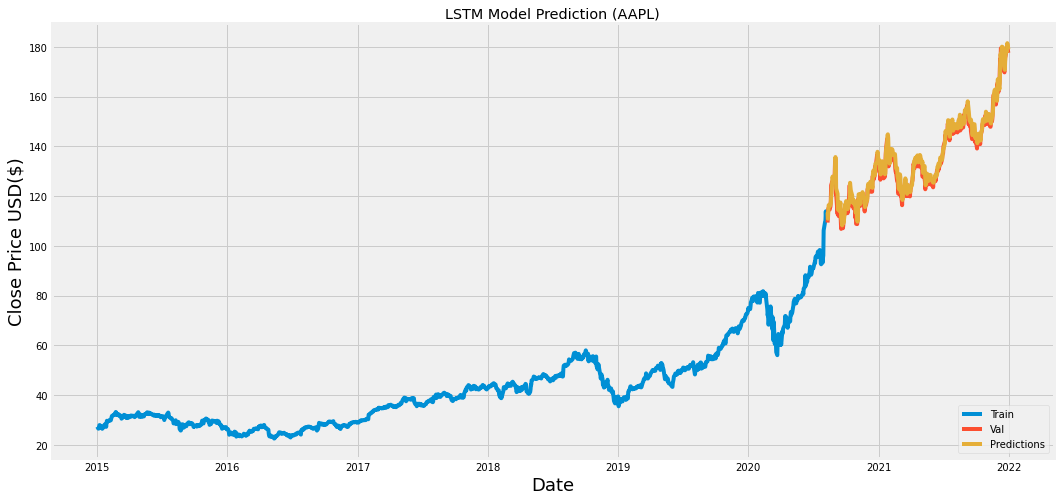

In [13]:
#visualize the data

plt.figure(figsize=(16,8))
plt.title('LSTM Model Prediction (AAPL)')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [14]:
#Show the valid and predicted prices
print(valid)

                 Close  Predictions
Date                               
2020-08-11  109.375000   113.451706
2020-08-12  113.010002   110.913834
2020-08-13  115.010002   113.555855
2020-08-14  114.907501   116.368202
2020-08-17  114.607498   116.696976
...                ...          ...
2021-12-27  180.330002   178.095337
2021-12-28  179.289993   181.472488
2021-12-29  179.380005   180.693069
2021-12-30  178.199997   180.150467
2021-12-31  177.570007   178.993164

[352 rows x 2 columns]


In [15]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start = '2015-01-01',end='2022-03-07')
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing value and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#Create an empty list
X_test = []

#Append the past 60 days
X_test.append(last_60_days_scaled)

#Convert the X_test data to a numpy array.
X_test = np.array(X_test)

#Reshape the data again
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

#Get the predicted scaled price 
pred_price = model.predict(X_test)

#Undo the Scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[160.47377]]


In [16]:
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start = '2022-03-08',end='2022-03-08')
print(apple_quote2['Close'])  

Date
2022-03-08    157.440002
Name: Close, dtype: float64


In [30]:
print('The predicted price of the stock is = {}'.format(pred_price))
print('The actual price of the stock is = {}'.format(apple_quote2['Close']))

The predicted price of the stock is = [[160.47377]]
The actual price of the stock is = Date
2022-03-08    157.440002
Name: Close, dtype: float64
